In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import hilbert

In [2]:

fs = 48_000

# - Load a speech sample
sig_test, samplefreq = sf.read("paper_plots/84-121123-0020.flac")
time_test = np.arange(len(sig_test)) / samplefreq
time_fs = np.linspace(time_test[0], time_test[-1], int(len(sig_test) / samplefreq * fs))
sig_test = np.interp(time_fs, time_test, sig_test)

sig_hilbert = hilbert(sig_test)


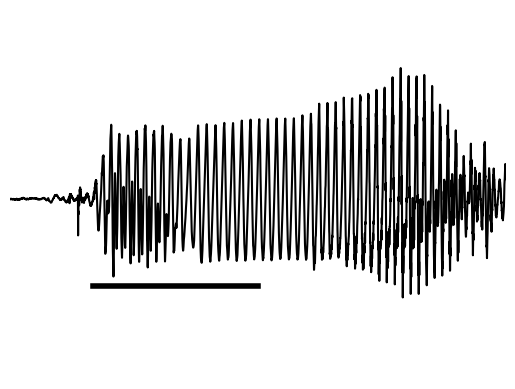

In [3]:
plt.plot(time_fs, sig_test, 'k-')
plt.xlim([2.95, 3.25])
plt.xticks([])
plt.yticks([])
plt.box(False)

plt.plot([3, 3.1], [-.2, -.2], 'k-', lw=4)

plt.savefig('hilbert_example/speech.pdf', dpi=300, bbox_inches='tight', transparent=True)

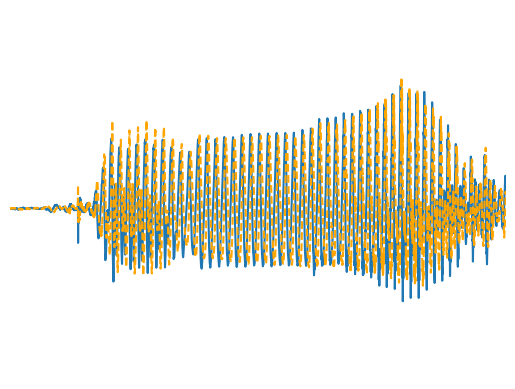

In [4]:
plt.plot(time_fs, np.real(sig_hilbert))
plt.plot(time_fs, np.imag(sig_hilbert), "--", color="orange", label="Hilbert-Q")
plt.xlim([2.95, 3.25])
plt.xticks([])
plt.yticks([])
plt.box(False)

# plt.plot([3, 3.1], [-.2, -.2], 'k-', lw=4)
plt.savefig('hilbert_example/hilbert_real_imag.pdf', dpi=300, bbox_inches='tight', transparent=True)

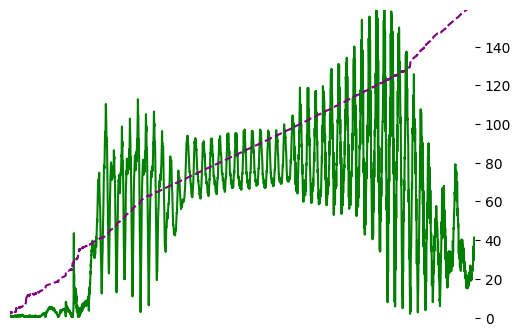

In [11]:
sig_amp = np.abs(sig_hilbert)
sig_phase = np.unwrap(np.angle(sig_hilbert))

plt.figure(figsize=(6, 4))
plt.plot(time_fs, sig_amp, color='green')
plt.ylim([0, .31])
plt.yticks([])
plt.box(False)

ax = plt.gca().twinx()
plt.plot(time_fs, (sig_phase - 14100)/np.pi, "--", color='purple')
plt.xlim([2.95, 3.25])
plt.ylim([0, 500/np.pi])

plt.box(False)
plt.xticks([])

# plt.plot([3, 3.1], [-.2, -.2], 'k-', lw=4)

plt.savefig('hilbert_example/hilbert_amplitude_phase.pdf', dpi=300, bbox_inches='tight', transparent=True)